In [103]:
import scipy.io
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import math

In [46]:
# open a .mat file
mat = scipy.io.loadmat('Bird_tags_Train.mat')

In [47]:
len(mat["Bird_tags"])

13811

In [130]:
index = 20
mat["Bird_tags"][index]

array([array([[(array(['Sylvia_atricapilla'], dtype='<U18'), array(['20190621_030000.WAV'], dtype='<U19'), array([[ 5.23728814,  1.77966102,  1.77966102,  5.23728814, 60.78373086,
                       65.84664386]]), array([[60.78373086,  5.23728814],
                      [60.78373086,  1.77966102],
                      [65.84664386,  1.77966102],
                      [65.84664386,  5.23728814],
                      [60.78373086,  5.23728814]]), array([[2]], dtype=uint8))                                                                                                     ]],
             dtype=[('species', 'O'), ('file', 'O'), ('Range', 'O'), ('trace', 'O'), ('type', 'O')])                                                                                  ],
      dtype=object)

In [91]:
print("Species: ", mat["Bird_tags"][index][0][0][0][0])
print("File audio: ", mat["Bird_tags"][index][0][0][0][1])
print("Range (da ignorare): ", mat["Bird_tags"][index][0][0][0][2])
print("Bounding Boxes: ", mat["Bird_tags"][index][0][0][0][3][:4])

Species:  ['Regulus_ignicapilla']
File audio:  ['20190621_030000.WAV']
Range (da ignorare):  [[ 8.22033898  6.28813559  6.28813559  8.22033898 26.15791864 28.90950179]]
Bounding Boxes:  [[26.15791864  8.22033898]
 [26.15791864  6.28813559]
 [28.90950179  6.28813559]
 [28.90950179  8.22033898]]


In [92]:
# load wav file
import scipy.io.wavfile

audio_path = "C:\\Users\\giaco\\Desktop\\thesis\\20190621_010000.WAV"
rate, data = scipy.io.wavfile.read('C:\\Users\\giaco\\Desktop\\thesis\\20190621_010000.WAV')
rate

48000

In [93]:
y, sr = librosa.load(audio_path)
hop_length = 512
specto = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)), ref=np.max)

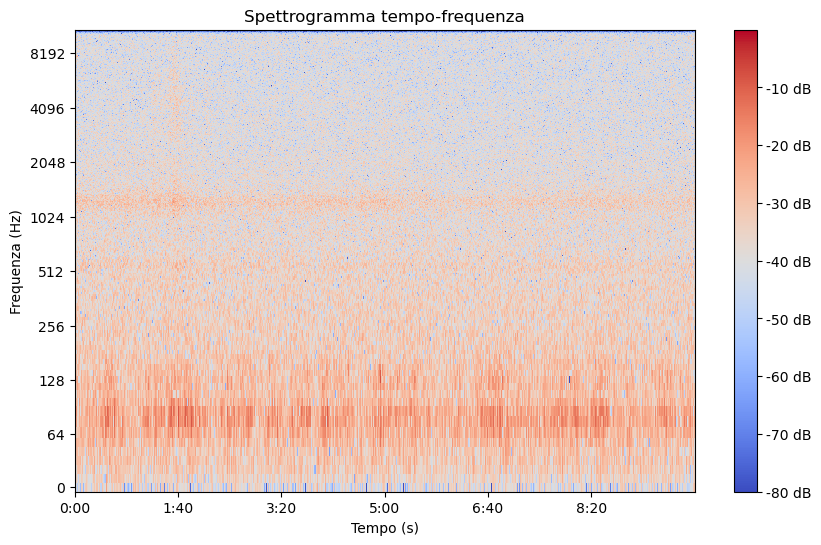

In [94]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(specto, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spettrogramma tempo-frequenza')
plt.xlabel("Tempo (s)")
plt.ylabel("Frequenza (Hz)")
plt.show()

In [96]:
bbox = mat["Bird_tags"][index][0][0][0][3][:4]
bbox

array([[26.15791864,  8.22033898],
       [26.15791864,  6.28813559],
       [28.90950179,  6.28813559],
       [28.90950179,  8.22033898]])

In [ ]:
# extract info from bounding boxes
start_time = min(bbox[:, 1])
end_time = max(bbox[:, 1])
freq_min = min(bbox[:, 0])
freq_max = max(bbox[:, 0])
bbox, start_time, end_time, freq_min, freq_max

(array([[26.15791864,  8.22033898],
        [26.15791864,  6.28813559],
        [28.90950179,  6.28813559],
        [28.90950179,  8.22033898]]),
 6.288135593220337,
 8.220338983050846,
 26.157918639867837,
 28.909501789647575)

In [115]:
# converti start_time e end_time in secondi
start_time = math.floor(start_time) * 60 + (start_time - math.floor(start_time)) * 60
end_time = math.floor(end_time) * 60 + (end_time - math.floor(end_time)) * 60
start_time, end_time

(377.28813559322026, 493.22033898305074)

In [124]:
# converti in dominio di tempo e frequenza
start_frame = int(start_time * sr / hop_length)
end_frame = int(end_time * sr / hop_length)

bin_min = round(freq_min)
bin_max = round(freq_max)

start_frame, end_frame, bin_min, bin_max

(16248, 21241, 26, 29)

In [125]:
spectro_event = specto[bin_min:bin_max, start_frame:end_frame]

In [126]:
spectro_event

array([[-35.890324, -30.243488, -31.494186, ..., -29.805038, -29.999119,
        -32.84776 ],
       [-30.803547, -29.583961, -36.121525, ..., -27.399189, -24.876339,
        -26.575058],
       [-42.134476, -30.041145, -40.555614, ..., -26.987694, -24.58004 ,
        -25.334763]], dtype=float32)

In [128]:
evento_audio = librosa.griffinlim(spectro_event, hop_length=hop_length)
# output an audio file
scipy.io.wavfile.write('evento_audio.wav', rate, evento_audio)